In [19]:
import pandas as pd 
import numpy as np 
import pickle
from gensim.models import word2vec

In [23]:
df=pd.read_csv('D:\Work\Projects\drug_recommender\src\Data\cleaned_training_data.csv')

<>:1: SyntaxWarning: invalid escape sequence '\W'
<>:1: SyntaxWarning: invalid escape sequence '\W'
C:\Users\HP\AppData\Local\Temp\ipykernel_17312\538867739.py:1: SyntaxWarning: invalid escape sequence '\W'
  df=pd.read_csv('D:\Work\Projects\drug_recommender\src\Data\cleaned_training_data.csv')


In [21]:
df[df['processed effect']==np.nan]

,Unnamed: 0.1,Unnamed: 0,drug_name,side_effects,processed effect


In [22]:
from gensim.models import keyedvectors
path = "D:/Work/NLP_&_ML/NLP_&_DL/GoogleNews-vectors-negative300.bin"
wv=keyedvectors.load_word2vec_format(path,binary=True)

KeyboardInterrupt: 

In [ ]:
def words_to_vectors(text,model):
    for i in text:
        words=i.lower().split()
        vectors = [model[word] for word in words if word in model]
        if vectors : 
            return np.mean(vectors,axis=0)
        else : 
            return np.zeros(model.vector_size)

In [ ]:
df['processed effect']=df['processed effect'].astype('str')

In [ ]:
# from utils.helper import words_to_vectors
x=np.array([words_to_vectors(text,wv) for text in df['processed effect']])
y=np.array(df['drug_name'])

In [ ]:
print(x.shape)
print(y.shape)

(2807, 300)
(2807,)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
similarity=cosine_similarity(x)

In [ ]:
similarity[0]

array([1.        , 1.        , 0.27249493, ..., 1.        , 0.59470954,
       1.        ])

In [ ]:
# with open('similarity.pkl','wb') as file : 
#     pickle.dump(similarity,file)

In [28]:
l=[len(i) for i in df['drug_name'].astype('str')]

### Training Prediction Model
training from dataset 

In [2]:
from utils.helper import load_final_data
import pandas as pd 
import numpy as np 
import pickle

In [104]:
df=load_final_data()

In [105]:
df[df['drug_name']=='doxycycline'].symptom2[0]

'swelling face'

In [106]:
df['drug_name']=df['drug_name'].dropna(axis=0)

In [107]:
df.dropna(subset=['drug_name'],inplace=True)

In [108]:
df.dropna(subset=['to_be_split'],inplace=True)

In [109]:
df.isnull().sum()

Unnamed: 0.1       0
Unnamed: 0         0
drug_name          0
to_be_split        0
symptom1           0
symptom2           0
symptom3           2
symptom4           8
symptom5         234
symptom6         361
symptom7         458
symptom8         542
symptom9         631
symptom10        726
symptom11        839
symptom12        928
symptom13       1009
symptom14       1054
symptom15       1118
dtype: int64

In [110]:
df.fillna('o',inplace=True)

In [111]:
x=df.drop(['Unnamed: 0.1','Unnamed: 0','drug_name','to_be_split'],axis=1)
y=df['drug_name']

In [84]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [112]:
import numpy as np

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
x = ordinal_enc.fit_transform(x)


In [114]:
with open('original_enc.pkl','wb')as file: 
    pickle.dump(ordinal_enc,file)

In [85]:
for col in x.columns:
    x[col]=x[col].astype(str)
    x[col]=lb.fit_transform(x[col])

In [115]:
from sklearn.preprocessing import LabelEncoder
pred_enc=LabelEncoder()
y=pred_enc.fit_transform(y)

In [116]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler=StandardScaler()
# x_train=scaler.fit_transform(x_train)
# x_test=scaler.transform(x_test)

In [118]:
with open('pred_enc.pkl','wb') as file: 
    pickle.dump(pred_enc,file)

In [119]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [120]:
# making a dl model 
model=Sequential([
    Dense(128,activation='relu',input_shape=(x_train.shape[1],)),
    Dense(64,activation='relu'),
    Dense(32,activation='relu'),
    Dense(16,activation='relu'),
    Dense(1)
])

d:\Work\Projects\drug_recommender\denv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [124]:
#compiling the model
model.compile(optimizer='adam',loss='mean_absolute_error',metrics=['mse'])

In [122]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 128)            │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,929 (50.50 KB)

 Trainable params: 12,929 (50.50 KB)

 Non-trainable params: 0 (0.00 B)

In [125]:
from tensorflow.keras.callbacks import EarlyStopping

In [126]:
earlystopping=EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)

In [127]:
# training the model
model.fit(x_train,np.log1p(y_train),validation_data=(x_test,np.log1p(y_test)),epochs=100,callbacks=[earlystopping])

Epoch 1/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.7870 - mse: 131.8074 - val_loss: 2.3963 - val_mse: 10.6309
Epoch 2/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4455 - mse: 10.2306 - val_loss: 2.1118 - val_mse: 6.6282
Epoch 3/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8726 - mse: 6.0377 - val_loss: 2.4721 - val_mse: 9.2111
Epoch 4/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8144 - mse: 5.5505 - val_loss: 1.2343 - val_mse: 2.8703
Epoch 5/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3945 - mse: 3.3067 - val_loss: 1.3783 - val_mse: 3.5128
Epoch 6/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3614 - mse: 3.1602 - val_loss: 1.7039 - val_mse: 4.0220
Epoch 7/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3149 - mse: 2.8900 - val_loss: 1.0419 - val_mse: 1.9077
Epoch 8/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0095 - mse: 1.7692 - val_loss: 0.9867 - val_mse: 1.9272
Epoch 9/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0

In [128]:
test_loss,test_mae=model.evaluate(x_test,np.log1p(y_test))
print(test_loss,test_mae)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8508 - mse: 1.4993 
0.8083528876304626 1.2871676683425903


In [108]:
# dummy model 
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
dummy = DummyRegressor(strategy='mean')
dummy.fit(x_train, np.log1p(y_train))
print("Baseline MSE:", mean_squared_error(np.log1p(y_test), dummy.predict(x_test)))


Baseline MSE: 1.0036876777222494


In [ ]:
import matplotlib.pyplot as plt

(0.0, 500.0)

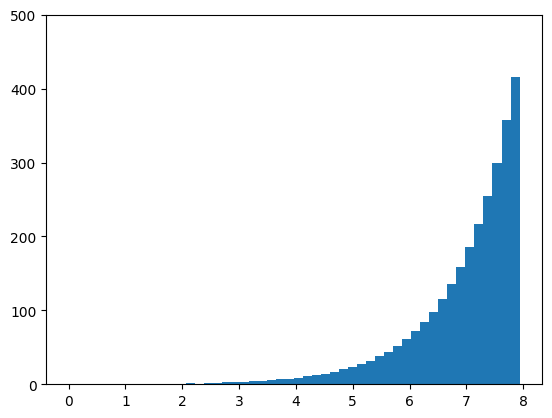

In [102]:
plt.hist(np.log1p(y),bins=50)
plt.ylim(0,500)

In [116]:
x_test

,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,symptom7,symptom8,symptom9,symptom10,symptom11,symptom12,symptom13,symptom14,symptom15
1593,38,175,106,296,287,437,208,321,328,328,338,323,332,309,297
2439,38,175,106,315,283,422,123,340,50,371,448,287,445,263,54
2473,37,175,106,390,546,436,156,204,328,328,338,323,332,309,297
1537,8,44,110,433,23,183,377,285,292,427,301,45,64,289,203
1128,37,175,106,228,117,578,135,123,328,328,338,323,332,309,297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2616,38,175,106,247,369,241,363,119,363,240,338,323,332,309,297
1028,189,3,170,132,255,427,452,480,486,183,234,41,428,281,38
2539,159,167,192,28,145,490,326,459,280,266,460,283,300,309,297
2264,189,3,170,132,255,427,452,480,486,183,234,41,428,281,38


In [133]:
model.predict(np.array([[38,175,106,-1,287,-1,208,321,328,-1,338,323,332,309,-1]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[5.5766726]], dtype=float32)

In [135]:
np.expm1(5.56)

258.8228363229507

In [137]:
pred_enc.inverse_transform([2541])

array(['mometasone'], dtype=object)

In [138]:
model.save('pred_model.h5')

In [125]:
model.save('keras_format.keras')

In [1]:
import pickle

In [3]:
lst=[]
for i in range(15):
    lst.append(f'symptom{i+1}')

In [4]:
from utils.helper import split_symptoms
inp=split_symptoms('difficult breathing swelling face throat severe skin reaction fever sore throat burning eyes skin pain red purple skin rash spreads causes blistering peeling')

In [5]:
from utils.helper import load_model
ob=load_model('D:/Work/Projects/drug_recommender/final_models/original_enc.pkl')

In [6]:
model=load_model('D:/Work/Projects/drug_recommender/final_models/pred_model.h5')

d:\work\projects\drug_recommender\utils\helper.py:12: SyntaxWarning: invalid escape sequence '\W'
  return pd.read_csv("D:\Work\Projects\drug_recommender\src\Data\cleaned_training_data.csv")
d:\work\projects\drug_recommender\utils\helper.py:15: SyntaxWarning: invalid escape sequence '\W'
  return pd.read_csv("D:\Work\Projects\drug_recommender\src\Data\data.csv")
d:\work\projects\drug_recommender\utils\helper.py:26: SyntaxWarning: invalid escape sequence '\W'
  return pd.read_csv('D:\Work\Projects\drug_recommender\src\Data\model_data.csv')


UnpicklingError: invalid load key, 'H'.

In [7]:
from Data_transformation.data_transformation import data_transform,convert_into_numberic
from prediction_pipeline.pred_pipline import predict_drug,inverse_label

In [8]:
transform_in=data_transform('difficult breathing swelling face throat severe skin reaction fever sore throat burning eyes skin pain red purple skin rash spreads causes blistering peeling')
numeric_in=convert_into_numberic(transform_in)
# predicting drug
num_pred=predict_drug(numeric_in)

d:\Work\Projects\drug_recommender\denv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


In [10]:
final_pred=inverse_label(num_pred)
final_pred

array(['Cetafen'], dtype=object)

In [ ]:
final

In [11]:
from utils.helper import load_output_data
df_0=load_output_data()

In [12]:
df_0[df_0['drug_name']==final_pred[0]]['generic_name'].values[0]

'acetaminophen (oral route, rectal route)'